<a href="https://colab.research.google.com/github/LegendsDen/DeepLearning/blob/main/tensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 10

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170M/170M [00:02<00:00, 63.3MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


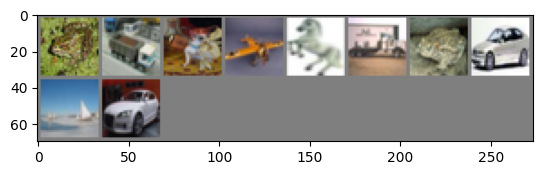

frog  truck dog   plane horse truck frog  car   ship  car  


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        print(self.conv1.weight[0])


    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

#create an instance of model
net = Net()

tensor([[[ 0.0378,  0.0045,  0.0368,  0.0730, -0.1067],
         [ 0.1008, -0.0699, -0.0139,  0.0180, -0.0096],
         [ 0.0889, -0.0896, -0.1147,  0.0715,  0.0636],
         [ 0.0637, -0.0617, -0.0312,  0.1058,  0.0230],
         [ 0.0189,  0.0923, -0.0909, -0.0994,  0.0269]],

        [[ 0.0207, -0.0926, -0.0322,  0.0974, -0.1128],
         [-0.0543,  0.0924, -0.0039, -0.0022, -0.0513],
         [ 0.0977, -0.0510, -0.0232, -0.0270,  0.0396],
         [ 0.0245,  0.0273, -0.0185,  0.0541, -0.0429],
         [ 0.0689,  0.0774,  0.0967,  0.0198,  0.0124]],

        [[ 0.0776, -0.0328, -0.0688, -0.0717, -0.0941],
         [ 0.0222, -0.0239,  0.0621, -0.0742, -0.0389],
         [-0.0654,  0.0086,  0.0875,  0.1030, -0.0450],
         [ 0.0621,  0.1085, -0.0355, -0.0662, -0.0583],
         [-0.1111,  0.0067,  0.0087, -0.0649,  0.0272]]],
       grad_fn=<SelectBackward0>)


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()

        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.300
[1,  4000] loss: 1.260
[2,  2000] loss: 1.181
[2,  4000] loss: 1.150
Finished Training


In [ ]:
torch.save(net,"trained_model_final.pth")

In [ ]:
from google.colab import files
files.download("trained_model_final.pth")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

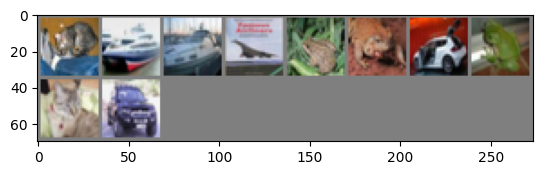

GroundTruth:  cat   ship  ship  plane frog  frog  car   frog  cat   car  


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(10)))

In [7]:
print(net.conv1.weight[0])

tensor([[[ 0.0378,  0.0045,  0.0368,  0.0730, -0.1067],
         [ 0.1008, -0.0699, -0.0139,  0.0180, -0.0096],
         [ 0.0889, -0.0896, -0.1147,  0.0715,  0.0636],
         [ 0.0637, -0.0617, -0.0312,  0.1058,  0.0230],
         [ 0.0189,  0.0923, -0.0909, -0.0994,  0.0269]],

        [[ 0.0207, -0.0926, -0.0322,  0.0974, -0.1128],
         [-0.0543,  0.0924, -0.0039, -0.0022, -0.0513],
         [ 0.0977, -0.0510, -0.0232, -0.0270,  0.0396],
         [ 0.0245,  0.0273, -0.0185,  0.0541, -0.0429],
         [ 0.0689,  0.0774,  0.0967,  0.0198,  0.0124]],

        [[ 0.0776, -0.0328, -0.0688, -0.0717, -0.0941],
         [ 0.0222, -0.0239,  0.0621, -0.0742, -0.0389],
         [-0.0654,  0.0086,  0.0875,  0.1030, -0.0450],
         [ 0.0621,  0.1085, -0.0355, -0.0662, -0.0583],
         [-0.1111,  0.0067,  0.0087, -0.0649,  0.0272]]],
       grad_fn=<SelectBackward0>)


In [8]:
from google.colab import files
uploaded = files.upload()


Saving trained_model_final.pth to trained_model_final.pth


In [9]:
net = torch.load("trained_model_final.pth")
net.eval()

<ipython-input-9-7625c0423758>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net = torch.load("trained_model_final.pth")


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [10]:
print(net.conv1.weight[0])

tensor([[[ 0.0896,  0.0737,  0.1768,  0.3465,  0.1815],
         [ 0.0157,  0.0958,  0.3258,  0.1908, -0.0961],
         [ 0.1332,  0.2367,  0.0947, -0.0886, -0.0526],
         [ 0.0744,  0.0986, -0.0377, -0.1141, -0.1473],
         [-0.1617, -0.3146, -0.3319, -0.2581, -0.0762]],

        [[-0.1562, -0.0611, -0.1257, -0.1513, -0.2157],
         [-0.1558, -0.0290,  0.0097, -0.0954, -0.3379],
         [-0.0703, -0.0135, -0.1279, -0.2811, -0.2371],
         [ 0.1270,  0.0462, -0.2569, -0.1927, -0.0333],
         [-0.1149, -0.1022, -0.1446, -0.0221,  0.0450]],

        [[-0.1313,  0.0314, -0.0236,  0.0923, -0.1579],
         [ 0.0032,  0.0201,  0.0972, -0.1455, -0.0609],
         [-0.0102,  0.2246,  0.0570,  0.0062, -0.0020],
         [ 0.1920,  0.1215, -0.0806, -0.1271,  0.0606],
         [ 0.0436, -0.1366,  0.0177,  0.1848,  0.3927]]],
       grad_fn=<SelectBackward0>)


In [11]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 58 %


In [12]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 78.7 %
Accuracy for class: car   is 80.4 %
Accuracy for class: bird  is 43.7 %
Accuracy for class: cat   is 48.4 %
Accuracy for class: deer  is 43.2 %
Accuracy for class: dog   is 37.5 %
Accuracy for class: frog  is 53.6 %
Accuracy for class: horse is 68.9 %
Accuracy for class: ship  is 57.9 %
Accuracy for class: truck is 70.5 %
